In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('titanic_train.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

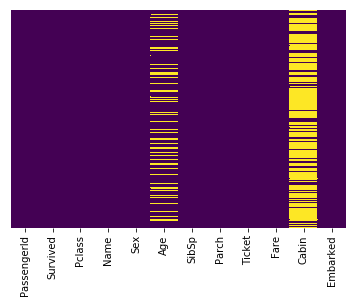

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

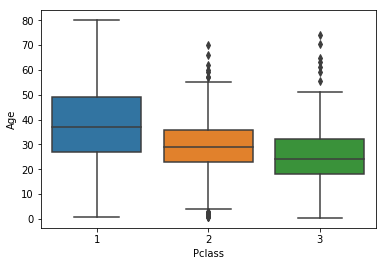

In [9]:
sns.boxplot(x='Pclass', y='Age', data=df)

In [10]:
def input_age(value):
    Age = value[0]
    Pclass = value[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 26
    else:
        return Age

In [11]:
df['Age'] = df[['Age','Pclass']].apply(input_age, axis=1)

In [12]:
df.drop('Cabin', axis=1, inplace=True)

In [13]:
df.dropna(inplace=True)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
df.drop('Ticket', axis=1, inplace=True)

In [16]:
sex = pd.get_dummies(df['Sex'], drop_first=True)

In [17]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [18]:
embarked = pd.get_dummies(df['Embarked'], drop_first=True)

In [19]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [20]:
df = pd.concat([df, sex, embarked], axis=1)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,0,1


In [22]:
df.drop(['Sex','Embarked'], axis=1, inplace=True)

In [23]:
df.drop(['PassengerId','Name'], axis=1, inplace=True)

In [24]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [26]:
logmodel = LogisticRegression()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
logmodel_pred = logmodel.predict(X_test)

In [32]:
dtree = DecisionTreeClassifier()

In [33]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
dtree_pred = dtree.predict(X_test)

In [35]:
rfc = RandomForestClassifier()

In [36]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
rfc_pred = rfc.predict(X_test)

In [38]:
gboost = GradientBoostingClassifier()

In [39]:
gboost.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [40]:
gboost_pred = gboost.predict(X_test)

In [41]:
svmodel = SVC()

In [42]:
svmodel.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
svmodel_pred = svmodel.predict(X_test)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

In [45]:
print(classification_report(y_test, svmodel_pred))
print('\n')
print(confusion_matrix(y_test, svmodel_pred))

             precision    recall  f1-score   support

          0       0.70      0.79      0.74       163
          1       0.59      0.47      0.52       104

avg / total       0.66      0.67      0.66       267



[[129  34]
 [ 55  49]]


In [46]:
print(classification_report(y_test, gboost_pred))
print('\n')
print(confusion_matrix(y_test, gboost_pred))

             precision    recall  f1-score   support

          0       0.84      0.91      0.87       163
          1       0.84      0.73      0.78       104

avg / total       0.84      0.84      0.84       267



[[148  15]
 [ 28  76]]


In [47]:
knn = KNeighborsClassifier()

In [48]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [49]:
knn_pred = knn.predict(X_test)

In [50]:
print(classification_report(y_test, knn_pred))
print('\n')
print(confusion_matrix(y_test, knn_pred))

             precision    recall  f1-score   support

          0       0.75      0.75      0.75       163
          1       0.61      0.61      0.61       104

avg / total       0.69      0.69      0.69       267



[[122  41]
 [ 41  63]]


In [51]:
accuracies = [accuracy_score(y_test, logmodel_pred),
             accuracy_score(y_test, dtree_pred),
             accuracy_score(y_test, rfc_pred),
             accuracy_score(y_test, knn_pred),
             accuracy_score(y_test, gboost_pred),
             accuracy_score(y_test, svmodel_pred)]
index = ['Logistic Regression',
        'Decision Tree',
        'Random Forest',
        'K Nearest Neighbors',
        'Gradient Boosting',
        'Support Vector Machines']

In [52]:
accuracy_matrix = pd.DataFrame(data=accuracies, index=index, columns=['Accuracy'])

In [53]:
accuracy_matrix

,Accuracy
Logistic Regression,0.808989
Decision Tree,0.779026
Random Forest,0.812734
K Nearest Neighbors,0.692884
Gradient Boosting,0.838951
Support Vector Machines,0.666667


In [54]:
recalls = [recall_score(y_test, logmodel_pred),
             recall_score(y_test, dtree_pred),
             recall_score(y_test, rfc_pred),
             recall_score(y_test, knn_pred),
             recall_score(y_test, gboost_pred),
             recall_score(y_test, svmodel_pred)]
index = ['Logistic Regression',
        'Decision Tree',
        'Random Forest',
        'K Nearest Neighbors',
        'Gradient Boosting',
        'Support Vector Machines']

In [55]:
recall_matrix = pd.DataFrame(data=recalls, index=index, columns=['Recall'])

In [56]:
recall_matrix

,Recall
Logistic Regression,0.653846
Decision Tree,0.682692
Random Forest,0.721154
K Nearest Neighbors,0.605769
Gradient Boosting,0.730769
Support Vector Machines,0.471154


In [57]:
model_metrics = pd.concat([accuracy_matrix, recall_matrix], axis=1)

In [58]:
model_metrics.sort_values(by='Accuracy', ascending=False)

,Accuracy,Recall
Gradient Boosting,0.838951,0.730769
Random Forest,0.812734,0.721154
Logistic Regression,0.808989,0.653846
Decision Tree,0.779026,0.682692
K Nearest Neighbors,0.692884,0.605769
Support Vector Machines,0.666667,0.471154


In [60]:
#The Gradient Boosting Algorithm performed the best as usual
#Using the Gradient Boosting Algorithm on the test dataset

In [61]:
df2 = pd.read_csv('titanic_test.csv')

In [62]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
df2.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

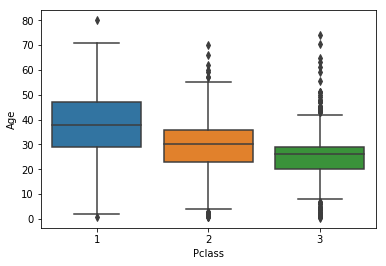

In [67]:
sns.boxplot(x='Pclass', y='Age', data=df)

In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [69]:
def input_age(value):
    Age = value[0]
    Pclass = value[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 26
    else:
        return Age

In [70]:
df2['Age'] = df2[['Age','Pclass']].apply(input_age, axis=1)

In [74]:
df2.dropna(inplace=True)

In [76]:
sex= pd.get_dummies(df2['Sex'], drop_first=True)
embark = pd.get_dummies(df2['Embarked'], drop_first=True)

In [79]:
df2.drop(['PassengerId','Sex','Embarked'], axis=1, inplace=True)

In [81]:
df2 = pd.concat([df2,sex,embark], axis=1)

In [84]:
df2.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [85]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [88]:
df2['Survived'] = gboost.predict(df2)

In [90]:
df2.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
0,3,34.5,0,0,7.8292,1,1,0,0
1,3,47.0,1,0,7.0000,0,0,1,0
2,2,62.0,0,0,9.6875,1,1,0,0
3,3,27.0,0,0,8.6625,1,0,1,0
4,3,22.0,1,1,12.2875,0,0,1,0


In [91]:
df2.tail()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
413,3,26.0,0,0,8.0500,1,0,1,0
414,1,39.0,0,0,108.9000,0,0,0,1
415,3,38.5,0,0,7.2500,1,0,1,0
416,3,26.0,0,0,8.0500,1,0,1,0
417,3,26.0,1,1,22.3583,1,0,0,0


In [ ]:
#AND I AM DONE